# Example 6.16

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Math
from scipy import stats
from scipy import linalg as la

In [2]:
def load_data() -> pd.DataFrame:
    df = pd.read_excel(r'..\..\data\Example6.16.xlsx')
    return df

In [3]:
df = load_data()
df.head(3)

,x1,x2,Group
0,5.0,3.0,1
1,4.5,3.2,1
2,6.0,3.5,1


In [4]:
# Break up the data into groups.
group_1 = df[df.Group.eq(1)].copy()
group_2 = df[df.Group.eq(2)].copy()

# Create columns with heights based on duplicate count for the dot diagrams.
group_1['x1_count'] = group_1.groupby('x1').cumcount()*0.01 + 0.01
group_1['x2_count'] = group_1.groupby('x2').cumcount()*0.01 + 0.01
group_2['x1_count'] = group_2.groupby('x1').cumcount()*0.01 + 0.02
group_2['x2_count'] = group_2.groupby('x2').cumcount()*0.01 + 0.02


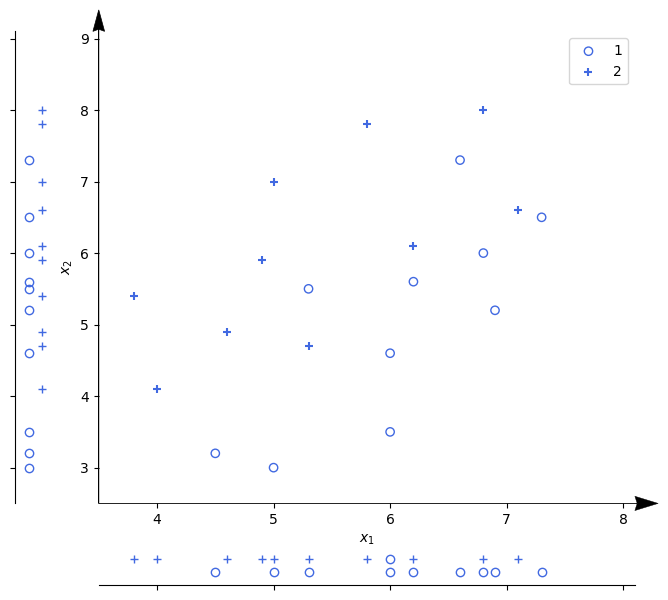

In [5]:
# Recreate Figure 6.6:

# Create figure
fig = plt.figure(figsize=(8, 8))
grid = fig.add_gridspec(4, 4, hspace=0.35, wspace=0.35,
                        width_ratios=[1, 10, 0.5, 0.5],
                        height_ratios=[0.5, 10, 1, 1])

# Main scatterplot.
ax_scatter = fig.add_subplot(grid[1:3, 1:])
ax_scatter.set_xlim(3.5,8.1)
ax_scatter.set_ylim(2.5,9.1)
ax_scatter.scatter(group_1.x1, group_1.x2, marker='o', facecolors='none', edgecolor='royalblue', label='1', alpha=1.0)
ax_scatter.scatter(group_2.x1, group_2.x2, marker='+', color='royalblue', label='2', alpha=1.0)
ax_scatter.set_xlabel('$x_{1}$')
ax_scatter.set_ylabel('$x_{2}$')
ax_scatter.legend()
ax_scatter.spines['top'].set_visible(False)
ax_scatter.spines['left'].set_visible(False)
ax_scatter.spines['right'].set_visible(False)
ax_scatter.spines['bottom'].set_visible(False)

# Arrow on the x-axis.
ax_scatter.arrow(3.5, 2.5, 4.8, 0., fc='k', ec='k', lw = 0.3, 
            head_width=0.2, head_length=0.2, overhang = 0.1, 
             length_includes_head= True, clip_on = False)

# Arrow on the y-axis.
ax_scatter.arrow(3.5, 2.5, 0, 6.9, fc='k', ec='k', lw = 0.5, 
            head_width=0.1, head_length=0.3, overhang = 0.1, 
             length_includes_head= True, clip_on = False)

# Stacked dot diagram below the x-axis.
ax_bottom = fig.add_subplot(grid[3, 1:], sharex=ax_scatter)
ax_bottom.set_ylim(0,0.03)
ax_bottom.plot(group_1.x1, group_1.x1_count, marker='o', linestyle='none', markerfacecolor='none', markeredgecolor='royalblue', alpha=1.0)
ax_bottom.plot(group_2.x1, group_2.x1_count, marker='+', linestyle='none', color='royalblue', alpha=1.0)
ax_bottom.tick_params(axis='x', which='both', bottom=True, labelbottom=False)
ax_bottom.set_yticks([])
ax_bottom.spines['top'].set_visible(False)
ax_bottom.spines['left'].set_visible(False)
ax_bottom.spines['right'].set_visible(False)

# # Stacked dot diagram to the left of the y-axis.
ax_left = fig.add_subplot(grid[1:3, 0], sharey=ax_scatter)
ax_left.set_xlim(0,0.03)
ax_left.plot(group_1.x2_count, group_1.x2, marker='o', linestyle='none', markerfacecolor='none', markeredgecolor='royalblue', alpha=1.0)
ax_left.plot(group_2.x2_count, group_2.x2, marker='+', linestyle='none', color='royalblue', alpha=1.0)
ax_left.tick_params(axis='y', which='both', left=True, labelleft=False)
ax_left.set_xticks([])
ax_left.spines['top'].set_visible(False)
ax_left.spines['right'].set_visible(False)
ax_left.spines['bottom'].set_visible(False)

plt.show()

In [6]:
n1 = n2 = 10
n = n1 + n2
p = 2
g = len(df.Group.unique())

### Univariate tests

Using the formulas found on page 300
$$
\text{SS}_{\text{tr}}
=
\sum_{\ell = 1}^{g} n_{\ell} {\left( \bar{x}_{\ell} - \bar{x} \right)}^{2}
$$
$$
\text{SS}_{\text{res}}
=
\sum_{\ell = 1}^{g} \sum_{j = 1}^{n_{\ell}} {\left( x_{\ell j} - \bar{x}_{\ell} \right)}^{2}
$$
$$
F
=
\frac{\text{SS}_{\text{tr}} / (g-1)}{\text{SS}_{\text{res}} / \left( \sum_{\ell = 1}^{g} n_{\ell} - g \right)}
$$
for the test
$$
\begin{array}{cc}
    \text{H}_{0}:& \tau_{1} = \tau_{2} \\
    \text{vs.}                       & \\
    \text{H}_{1}:& \tau_{1} \ne \tau_{2}
\end{array}
$$
where $\tau_{\ell} = \mu_{\ell} - \mu$

In [7]:
# Rows are variables and columns are groups.
xbar_groups = df.groupby('Group').mean(['x1','x2']).T

# Global mean.
xbar = df[['x1','x2']].mean().to_numpy()[:,np.newaxis]

# Mean values for x1 and x2 by group.
x1xbar = xbar_groups.loc['x1',:].to_numpy()[:,np.newaxis]
x2xbar = xbar_groups.loc['x2',:].to_numpy()[:,np.newaxis]

In [8]:
# Used for both tests.
alpha_one_way = 0.10
f_crit_one_way = stats.f.ppf(1-0.10,g-1,n-g)
display(Math(r'F_{\text{crit}}'
             '='
             r'F_{g-1, \sum_{\ell} n_{\ell} - g}(\alpha)'
             '='
             fr'F_{{ {g-1}, {n-g} }}({alpha_one_way})'
            '='
            f'{f_crit_one_way:.2f}' 
             ))

<IPython.core.display.Math object>

#### One-way ANOVA for $x_{1}$:

In [9]:
SS_tr_x1 = (10*(x1xbar - xbar[0])**2).sum()
SS_res_x1 = ((group_1.x1.to_numpy() - x1xbar[0])**2 + (group_2.x1.to_numpy() - x1xbar[1])**2).sum()
F_x1 = (SS_tr_x1/(g-1))/(SS_res_x1/(n-g))

In [10]:
display(Math('F_{x_{1}}'
             '='
             r'\frac{\text{SS}_{\text{tr}(x_{1})} / (g-1)}{\text{SS}_{\text{res}(x_{1})} / \left( \sum_{\ell = 1}^{g} n_{\ell} - g \right)}'
             '='
             fr'\frac{{ {SS_tr_x1:.2f} / ({g} - 1) }}{{ {SS_res_x1:.2f} / \left( {n} - {g} \right) }}'
             '='
             f'{F_x1:.2f}'
             ))


<IPython.core.display.Math object>

In [11]:
# Same statistic as running the one-way ANOVA method.
stats.f_oneway(group_1.x1,group_2.x1)

F_onewayResult(statistic=2.4591576779229225, pvalue=0.1342529358046891)

In [12]:
if F_x1 > f_crit_one_way:
    display(Math(fr'\text{{We have that }} F_{{ x_{1} }} = {F_x1:.2f} > F_{{ \text{{crit}} }} = F_{{ {g-1}, {n-g} }}({alpha_one_way}) = '
                 fr'{f_crit_one_way:.2f} \text{{, so we would reject the null hypothesis that }} '
                 r'\tau_{1} = \tau_{2} \text{ (for the variable }x_{1}\text{ the means for the two groups are equal)}.'
                 ))
else:
    display(Math(fr'\text{{We have that }} F_{{ x_{1} }} = {F_x1:.2f} < F_{{ \text{{crit}} }} = F_{{ {g-1}, {n-g} }}({alpha_one_way}) = '
                 fr'{f_crit_one_way:.2f} \text{{, so we would fail to reject the null hypothesis that }} '
                 r'\tau_{1} = \tau_{2} \text{ (for the variable }x_{1}\text{ the means for the two groups are equal)}.'
                ))

<IPython.core.display.Math object>

#### One-way ANOVA for $x_{2}$:

In [13]:
SS_tr_x2 = (10*(x2xbar - xbar[1])**2).sum()
SS_res_x2 = ((group_1.x2.to_numpy() - x2xbar[0])**2 + (group_2.x2.to_numpy() - x2xbar[1])**2).sum()
F_x2 = (SS_tr_x2/(g-1))/(SS_res_x2/(n-g))

In [14]:
display(Math('F_{x_{2}}'
             '='
             r'\frac{\text{SS}_{\text{tr}(x_{2})} / (g-1)}{\text{SS}_{\text{res}(x_{2})} / \left( \sum_{\ell = 1}^{g} n_{\ell} - g \right)}'
             '='
             fr'\frac{{ {SS_tr_x2:.2f} / ({g} - 1) }}{{ {SS_res_x2:.2f} / \left( {n} - {g} \right) }}'
             '='
             f'{F_x2:.2f}'
             ))

<IPython.core.display.Math object>

In [15]:
# Same statistic as running the one-way ANOVA method.
stats.f_oneway(group_1.x2,group_2.x2)

F_onewayResult(statistic=2.6775059056840385, pvalue=0.11913961809877849)

In [16]:
if F_x2 > f_crit_one_way:
    display(Math(fr'\text{{We have that }} F_{{ x_{2} }} = {F_x2:.2f} > F_{{ \text{{crit}} }} = F_{{ {g-1}, {n-g} }}({alpha_one_way}) = '
                 fr'{f_crit_one_way:.2f} \text{{, so we would reject the null hypothesis that }} '
                 r'\tau_{1} = \tau_{2} \text{ (for the variable }x_{2}\text{ the means for the two groups are equal)}.'
                 ))
else:
    display(Math(fr'\text{{We have that }} F_{{ x_{2} }} = {F_x2:.2f} < F_{{ \text{{crit}} }} = F_{{ {g-1}, {n-g} }}({alpha_one_way}) = '
                 fr'{f_crit_one_way:.2f} \text{{, so we would fail to reject the null hypothesis that }} '
                 r'\tau_{1} = \tau_{2} \text{ (for the variable }x_{2}\text{ the means for the two groups are equal)}.'
                ))

<IPython.core.display.Math object>

### Multivariate test

Using the assumptions from pages 284 and 285, that both populations are multivariate normal and their covariance matrices are equal, we construct the test:
$$
\begin{array}{cc}
    \text{H}_{0}: & \bm{\mu}_{1} - \bm{\mu}_{2} = \textbf{0} \Rightarrow \bm{\mu}_{1} = \bm{\mu}_{2} \\
    \text{vs.} & \\
    \text{H}_{1}: & \bm{\mu}_{1} - \bm{\mu}_{2} \ne \textbf{0} \Rightarrow \bm{\mu}_{1} \ne \bm{\mu}_{2}
\end{array}
$$

In [17]:
# Assuming equal covariance matrices for the two groups and small sample size (pages 285 and 286).
alpha = 0.01
f_value = stats.f.ppf(q=1-alpha, dfn=p, dfd=n-p-1)

In [18]:
S_pooled = (1/(n-g)) * sum([(df.Group.eq(g).sum() - 1) * np.cov(df.loc[df.Group.eq(g),['x1','x2']],rowvar=False) for g in df.Group.unique()])

In [19]:
# The values 1 and 2 in xbars[1] and xbars[2] are the column names not an index.
T2 = (xbar_groups[1] - xbar_groups[2]).T @ la.inv((1/n1 + 1/n2) * S_pooled) @ (xbar_groups[1] - xbar_groups[2])
display(Math(r'T^{2}'
             '='
             r'{[\bar{\textbf{X}}_{1} - \bar{\textbf{X}}_{2} - (\bm{\mu_{1}} - \bm{\mu_{2}})]}^{\prime}'
             r'{\left[ \left( \frac{1}{n_{1}} + \frac{1}{n_{2}} \right) \textbf{S}_{\text{pooled}} \right]}^{-1}'
             r'[\bar{\textbf{X}}_{1} - \bar{\textbf{X}}_{2} - (\bm{\mu_{1}} - \bm{\mu_{2}})]'
             '='
             f'{T2:.2f}'
             ))

<IPython.core.display.Math object>

In [20]:
const = ((n1 + n2 - 2)*p)/(n1 + n2 - (p + 1))
f_crit = const * f_value
f_crit
display(Math(r'\frac{(n_{1} - 1 + n_{2} - 1)p}{(n1 + n2 - (p + 1))}'
             r'F_{p, n_{1} + n_{2} - (p+1)}(\alpha)'
             '='
             fr'\frac{{ ({n1 + n2 - 2})({p}) }}{{ {n1 + n2 - (p + 1)} }}'
             fr'F_{{ {p}, {n-(p+1)} }}({alpha})'
             '='
             fr'{const:.3f} \times {f_value:.2f}'
             '='
             f'{f_crit:.2f}'
             ))

<IPython.core.display.Math object>

In [21]:
if T2 > f_crit:
    display(Math(fr'\text{{We have that }} T^{{2}} = {T2:.2f} > F_{{ {p}, {n1+n2-(p+1)} }}({alpha}) = '
                 fr'{f_crit:.2f} \text{{, so we would reject the null hypothesis that }} '
                 r'\bm{\mu}_{1} = \bm{\mu}_{2} \text{ (the mean vectors for the two groups are equal)}.'
                 ))
else:
    display(Math(fr'\text{{We have that }} T^{{2}} = {T2:.2f} < F_{{ {p}, {n1+n2-(p+1)} }}({alpha}) = '
                 fr'{f_crit:.2f} \text{{, so we would fail to reject the null hypothesis that }} '
                 r'\bm{\mu}_{1} = \bm{\mu}_{2} \text{ (the mean vectors for the two groups are equal)}.'
                ))

<IPython.core.display.Math object>